In [2]:
import numpy as np
import sys
sys.path.append('../scripts')
from proj1_helpers import *

In [3]:
def compute_mse(y, tx, w):
    e = y - tx.dot(w)
    return 1/(2*len(y)) * np.dot(e, e)

def compute_mean_squared_gradient(y, tx, w):
    err = y - tx.dot(w)
    grad = -tx.T.dot(y) / len(y)
    return grad, err

def compute_SGD_gradient(y,tx,w):
    err = y - tx.dot(w)
    grad = -tx.T.dot(y)
    return grad, err

def gradient_descent(y, tx, w_initial, max_iters, gradient_function, loss_function):
    w = w_initial
    for n in range(max_iters):
        # compute gradient
        grad, err = gradient_function(y, tx, w)

        # gradient w by descent update
        w = w - gamma * grad

    loss = loss_function(y, tx, w)
    return w, loss

In [4]:
def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    """Least Squares gradient descent algorithm"""
    w = initial_w
    for n in range(max_iters):
        # compute gradient
        grad, err = compute_mean_squared_gradient(y, tx, w)

        # gradient w by descent update
        w = w - gamma * grad

    loss = compute_mse(y, tx, w)
    return w, loss

In [5]:
def least_squares_SGD(y, tx, initial_w, max_iters, gamma):
    """Stochastic gradient descent."""
    # Define parameters to store w and loss
    w = initial_w

    for n_iter in range(max_iters):
        index = np.random.randint(0, len(y) - 1)
        # Compute a stochastic gradient and loss
        grad, err = compute_SGD_gradient(y[index], tx[index, :], w)

        # Update w through the stochastic gradient update
        w = w - gamma * grad

    loss = compute_mse(y, tx, w)
    return w, loss

In [6]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    w = np.linalg.solve(a, b)
    loss = compute_mse(y, tx, w)
    return w, loss

In [7]:
def ridge_regression(y, tx, lambda_):
    aI = 2 * tx.shape[0] * lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    w = np.linalg.solve(a, b)
    loss = compute_mse(y, tx, w)
    return w, loss

In [8]:
def reg_logistic_regression_loss(y, tx, w, lambda_):
    return (np.sum(np.log(1 + np.exp(np.dot(tx, w)))) - y.dot(np.dot(tx, w)))/len(y) + lambda_/2*np.vdot(w, w)

def log_likelihood_regularized_gradient(y, tx, w, lambda_):
    return np.dot(np.transpose(tx), sigmoid(np.dot(tx, w)) - y)/len(y) + lambda_*w

def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    w = initial_w
    for n in range(max_iters):
        grad = log_likelihood_regularized_gradient(y, tx, w, lambda_)
        w = w - gamma*grad       
    loss = reg_logistic_regression_loss(y, tx, w, lambda_)
    return w, loss

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def log_likelihood_gradient(y, tx, w):
    return np.dot(np.transpose(tx), sigmoid(np.dot(tx, w)) - y)/len(y)

def loss_logistic_regression(y, tx, w):
    return np.sum(np.log(1 + np.exp(np.dot(tx, w))) - y*np.dot(tx, w))/len(y)

def logistic_regression(y, tx, initial_w, max_iters, gamma):
    w = initial_w
    for n_iter in range(max_iters):
        grad = log_likelihood_gradient(y, tx, w)
        w = w - gamma*grad    
    loss = loss_logistic_regression(y, tx, w)
    return w, loss

In [10]:
def standardize(x):
    centered_data = x -np.mean(x,axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)
    
    return std_data

In [11]:
training_data_path = "../data/train.csv"
testing_data_path = "../data/test.csv"

y_training, training_data, ids = load_csv_data(training_data_path)
y_testing, testing_data, ids = load_csv_data(testing_data_path)

import matplotlib
import matplotlib.pyplot as plt

print(np.shape(training_data))



(250000, 30)


# Preprocessing

In [14]:
for i in range(np.shape(training_data)[1]):
    feature = training_data[:,i] 
    feature_class_1 = feature[y_training==-1]
    feature_class_1_clean = feature_class_1[feature_class_1!=-999]
    feature_mean_1 = np.mean(feature_class_1_clean)
    feature_class_2 = feature[y_training==1]
    feature_mean_2 = np.mean(feature_class_2[feature_class_2!=-999])
    for j in range(np.shape(training_data)[0]):
        if y_training[j] == -1 and training_data[j,i] == -999:
            training_data[j,i] = feature_mean_1;
        if y_training[j] == 1 and training_data[j,i] == -999:
            training_data[j,i] = feature_mean_2;


    


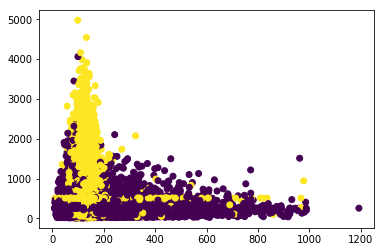

In [15]:
x1 = training_data[:,0]
x2 = training_data[:,5]

plt.scatter(x1,x2, c = y_training)
plt.show()

In [16]:
print(np.shape(training_data))

(250000, 30)


In [253]:
x = training_data[:,4] 
y = x[y_training!=-1]
print(np.shape(y))

(164333,)


In [291]:
init_w = np.ones(input_data.shape[1]);
#y[y==-1] = 0

    
#training_data[training_data==-999] = 0
#print(input_data)
training_data_st = standardize(training_data)
#a,b = logistic_regression(y_training,training_data_st, init_w, 10, 10**-12);
a,b = logistic_regression(y_training,training_data_st, init_w, 10, 10**-12);
#a,b = ridge_regression(y_training,training_data_st,1e-12);
y_train_pred = predict_labels(a,training_data_st)

print(sum(np.abs(y_train_pred - y_training))/2/np.shape(y_training)[0])


0.374232
